## Task: Data Preparation and Data Cleaning
### Importing libraries and overview of the dataset

NOTE:   ORIGINAL FILE WAS NOT A ZIPPED FILE, I JUST ZIPPED IT FOR PURPOSES OF FULFILLING THE ASSIGNMENT REQUIREMENT

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:

# Task: Data Preparation and Data Cleaning

# 1. Unzip the dataset and rename it to "Netflix_shows_movies"
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Define file paths
zip_file_path = r"D:\Python\4Assignment\netflix_data.zip"  # The path to the zipped dataset
output_dir = r"D:\Python\4Assignment\Netflix_shows_movies"  # Chosen output directory

In [29]:
# Unzip the dataset
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print(f"Dataset extracted to {output_dir}")

Dataset extracted to D:\Python\4Assignment\Netflix_shows_movies


In [30]:
# 2. Load the dataset into a DataFrame
file_path = os.path.join(output_dir, "Netflix_data.csv")  # Adjust the file name if needed
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
print(df.head())

    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  Un

In [31]:
# Get number of rows and columns in our data
df.shape

(6234, 12)

This reveals that there are 6234 rows and 12 columns in our dataset

In [32]:
#Check and list the Column Names in our dataset

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [33]:
#Check Data Types similar to what we see with the df.info

df.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [34]:
# Now let us summarize it all by checking the structure of the dataset in a single command.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB
None


### Explanation
There are 6234 records in the dataset
From the raw data, we can see that there are 10 non numerical columns and 2 numerical columns.

In [35]:
# How many unique values are in each column?
df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

# Let us examine the date column in particular 

In [36]:
#Do we have any duplicated values in our dataset?
df.duplicated().sum()



np.int64(0)

There are no duplicates in our dataset as seen above.

In [37]:
df['date_added'].head()

0    September 9, 2019
1    September 9, 2016
2    September 8, 2018
3    September 8, 2018
4    September 8, 2017
Name: date_added, dtype: object

The dates are rightly represented

In [38]:
# 3. Check for missing values in the dataset
missing_data = df.isnull().sum()
print("Missing values in each column:")
print(missing_data)

Missing values in each column:
show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


## Explanation of the missing values
director  column has the highest number of rows with missing values. 1969 rows are missing a value in this column.
Then other columns with missing values into cast, country and date_added have some missing values too.
rating column has the least number of missing values which is 10.

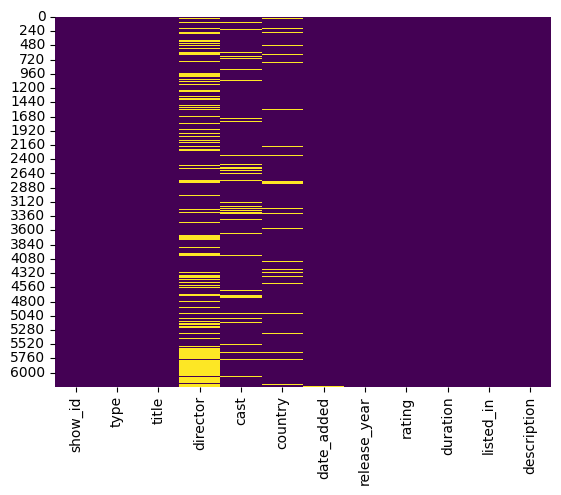

In [39]:
#Let us visualize these missing values
# import relevant libraries for visualization.
#import seaborn as sns 
#import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

See explanation above for the missing values.

In [40]:
# 4. Handling missing values:
# Impute missing values (if it makes more sense in context)
# For numerical columns:
df['release_year'] = df['release_year'].fillna(df['release_year'].median())  

# For categorical columns:
df['director'] = df['director'].fillna(df['director'].mode()[0])  # Adjust for the correct column
#New dataframe 

# 6. Optionally, save the cleaned dataset for further use
cleaned_file_path = os.path.join(output_dir, "Netflix_data_cleaned.csv")
df_cleaned = pd.read_csv(cleaned_file_path)
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to {cleaned_file_path}")



Cleaned dataset saved to D:\Python\4Assignment\Netflix_shows_movies\Netflix_data_cleaned.csv


In [41]:
# 5. Verify that missing values have been addressed

missing_data_after_cleaning = df_cleaned.isnull().sum()
print("Missing values after cleaning:")
print(missing_data_after_cleaning)

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


Let us perform a quick summary analysis  after cleaning

In [42]:
# Display the first few rows to understand the structure of the data
print(df_cleaned.head())

    show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
1  80125979  Movie                             #realityhigh   
2  70304989  Movie                                 Automata   
3  80164077  Movie       Fabrizio Copano: Solo pienso en mi   
4  70304990  Movie                              Good People   

                          director  \
0         Richard Finn, Tim Maltby   
1                 Fernando Lebrija   
2                      Gabe Ibáñez   
3  Rodrigo Toro, Francisco Schultz   
4                Henrik Ruben Genz   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1  Nesta Cooper, Kate Walsh, John Michael Higgins...   
2  Antonio Banderas, Dylan McDermott, Melanie Gri...   
3                                    Fabrizio Copano   
4  James Franco, Kate Hudson, Tom Wilkinson, Omar...   

                                          country      

In [43]:
# Display the first few rows to understand the structure of the data
df_cleaned.nunique()

show_id         3774
type               2
title           3752
director        2920
cast            3667
country          433
date_added      1014
release_year      69
rating            14
duration         184
listed_in        296
description     3766
dtype: int64

In [44]:
# we need to convert the ID column to a non numerical, thus to a categorical column
df_cleaned['show_id'] = df_cleaned['show_id'].astype(str)

## Performing some basic Univariate Analysis

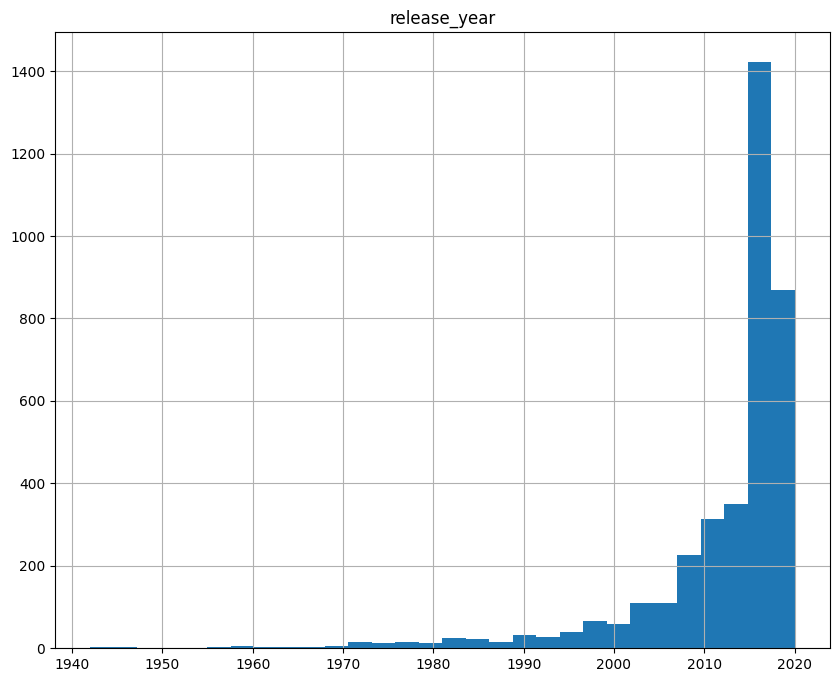

In [45]:
# Distribution of Numerical Data in our dataframe
df_cleaned.hist(figsize=(10, 8), bins=30)
plt.show()

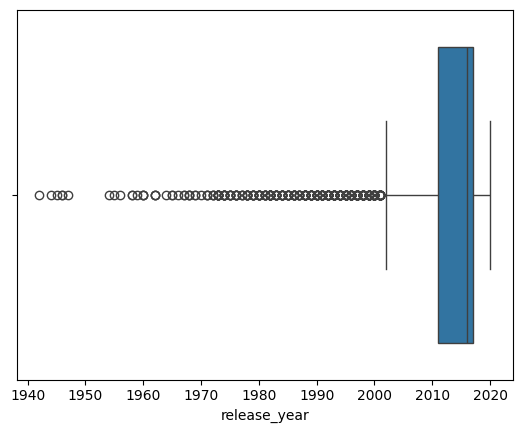

In [46]:
#Box Plot for Outliers

sns.boxplot(x=df_cleaned['release_year'])
plt.show()

In [47]:
#Value Counts for Categorical Data

df_cleaned['rating'].value_counts()

rating
TV-MA       1189
TV-14        917
R            501
TV-PG        358
PG-13        278
PG           176
NR           175
TV-G          54
TV-Y7         48
G             35
TV-Y          24
TV-Y7-FV      11
UR             7
NC-17          1
Name: count, dtype: int64

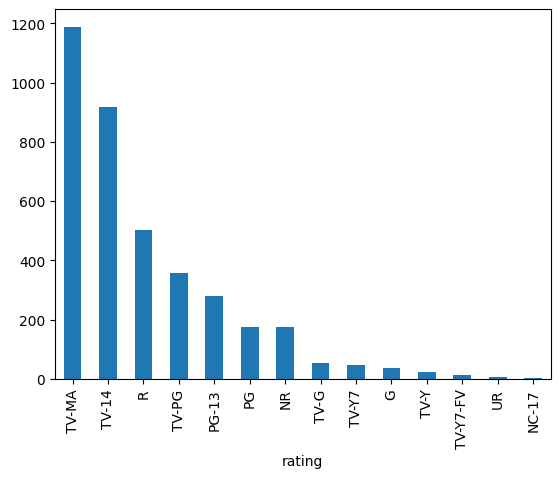

In [48]:
df_cleaned['rating'].value_counts().plot(kind='bar')
plt.show()

### 4 Data Visualization:
Create visualizations to represent the following:
- Most watched genres.
- Ratings distribution.

#### Instructions
- Import required libraries (Already done above)
- Load the dataset- we shall use the cleaned datased


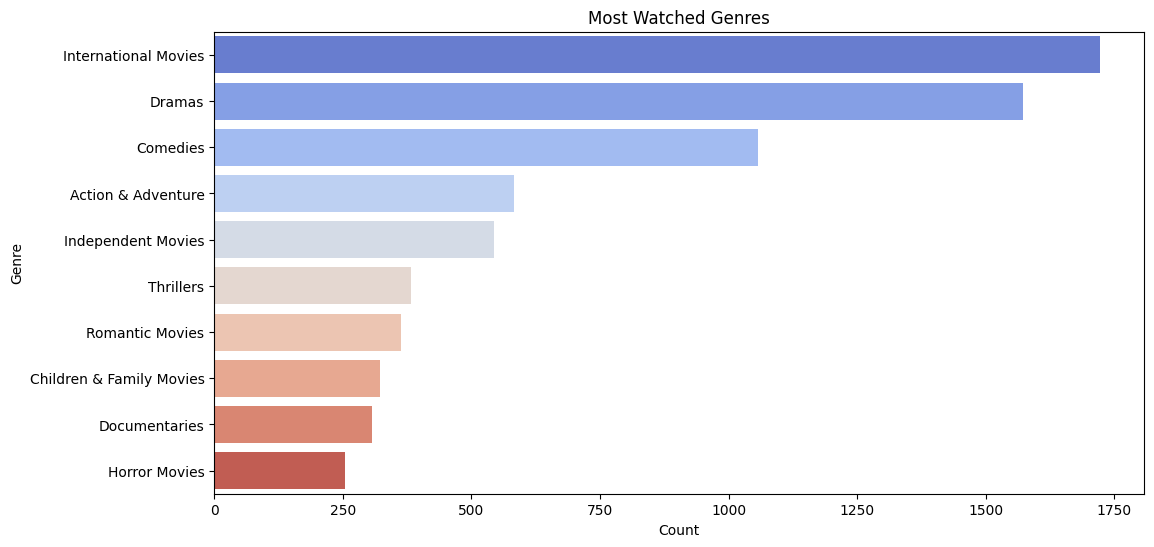

In [49]:
from collections import Counter

# Ensure 'listed_in' column has no null values
df_cleaned['listed_in'] = df_cleaned['listed_in'].fillna('Unknown')

# Flatten and count occurrences of genres
genre_list = [genre.strip() for genres in df_cleaned['listed_in'] for genre in genres.split(',')]
genre_counts = Counter(genre_list)

# Convert to DataFrame
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot the top 10 genres
plt.figure(figsize=(12,6))
sns.barplot(x=genre_df['Count'][:10], y=genre_df['Genre'][:10], hue=genre_df['Genre'][:10], palette='coolwarm', legend=False)
plt.xlabel("Count")
plt.ylabel("Genre")
plt.title("Most Watched Genres")
plt.show()



#### Explanation of the visuation above
International Movies is the most watched genre followed by drammas and then commedies. 
Horror movies is the least watch as per the visualization above and documentaries in that order. 

### Please open the R script called *"R integration.R"* in this same folder to run and visualize this graphic in a more clear way.

C:\Users\KNT\AppData\Local\Temp\ipykernel_19192\1015194278.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette='viridis')


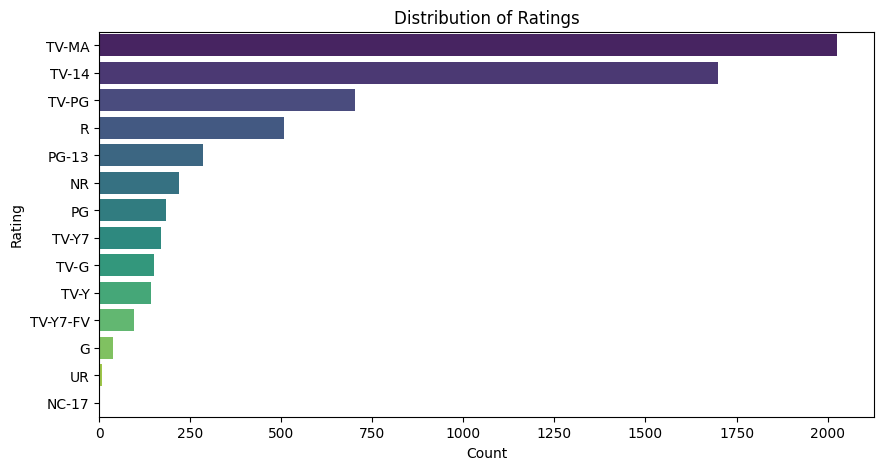

: 

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Rating")
plt.title("Distribution of Ratings")
plt.show()


#### Explanation of the rating distribution above
Most of the movies were rated with TV-MA followed by TV-14.

NC-17 and UR are the least ratings. 

## R  Integration for visualization of the most watched genres
- Here are the instructions:
- Using rpy2 Library:
- Ensure rpy2 Library is installed
-  use the terminal to run the command 
pip install rpy2

- After installing, let us run R code from this Python jupyter notebook using the rpy2 interface.

## Note that my server was crashing and I did not implement this approach, rather open the R script within the RStudio if you encounter issues with this approach.

import subprocess

# Run the R script with shell=True
subprocess.run(['Rscript', 'D:/Python/4Assignment/R integration.R'], shell=True)



